# SyriaTel Customer Churn Prediction

## Business Understanding

**Business Problem:** SyriaTel, a telecommunications company, is experiencing customer churn which leads to significant revenue loss. The company wants to identify customers who are likely to stop doing business with them soon.

**Objective:** Build a binary classification model to predict whether a customer will churn (leave the company) based on their usage patterns and account information.

**Success Metrics:**
- High recall for churn cases (minimize false negatives - we don't want to miss customers who will churn)
- Good overall accuracy and precision
- Identify key factors driving customer churn

**Stakeholders:** SyriaTel business executives, customer retention team, marketing department

## Import Data

In [257]:
# importing the necessary libraries

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)


## Load And Explore Data

In [258]:
# loading the dataset

df = pd.read_csv('archive (1)/bigml_59c28831336c6604c800002a.csv')
df.head(10)        

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,391-8027,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,355-9993,no,yes,24,218.2,88,37.09,...,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,329-9001,yes,no,0,157.0,79,26.69,...,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,335-4719,no,no,0,184.5,97,31.37,...,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,330-8173,yes,yes,37,258.6,84,43.96,...,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [259]:
# checking the shape
df.shape

(3333, 21)

In [260]:
# checking the columns that we have
df.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='str')

In [261]:
# checking how our dataset looks like
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   str    
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   str    
 4   international plan      3333 non-null   str    
 5   voice mail plan         3333 non-null   str    
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   int64  
 15

In [262]:
# checking for statistical summary
df.describe

<bound method NDFrame.describe of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes   

In [263]:
# checking for statistical summary that includes everything

df.describe(include='all')

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
count,3333,3333.000000,3333.000000,3333,3333,3333,3333.000000,3333.000000,3333.000000,3333.000000,...,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333
unique,51,NaN,NaN,3333,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,WV,NaN,NaN,382-4657,no,no,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,106,NaN,NaN,1,3010,2411,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2850
mean,NaN,101.064806,437.182418,NaN,NaN,NaN,8.099010,179.775098,100.435644,30.562307,...,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,NaN
std,NaN,39.822106,42.371290,NaN,NaN,NaN,13.688365,54.467389,20.069084,9.259435,...,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,NaN
min,NaN,1.000000,408.000000,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,74.000000,408.000000,NaN,NaN,NaN,0.000000,143.700000,87.000000,24.430000,...,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,NaN
50%,NaN,101.000000,415.000000,NaN,NaN,NaN,0.000000,179.400000,101.000000,30.500000,...,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,NaN
75%,NaN,127.000000,510.000000,NaN,NaN,NaN,20.000000,216.400000,114.000000,36.790000,...,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,NaN


In [264]:
# checking whether we have any missing values
df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

In [265]:
# Checking for duplicates
duplicates = df.duplicated().sum()
duplicates


np.int64(0)

## Exploratory Data Analysis (EDA)

### Target Variable Analysis

* since we don't have any missing values,we are good to go ahead.

* We will start doing visualization

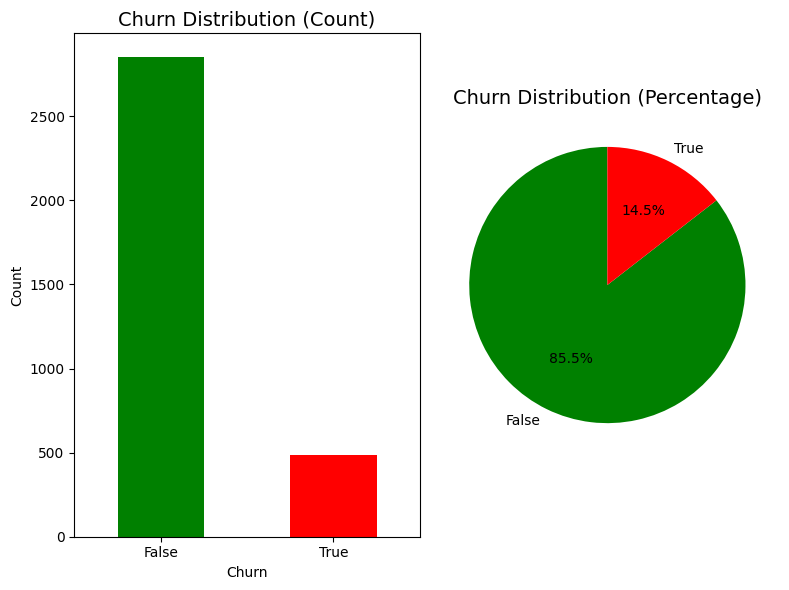

In [266]:
# start plotting 

plt.rcParams['figure.figsize'] = (12, 6)

# CHURN DISTRIBUTION
plt.figure(figsize=(8, 6))
churn_counts = df['churn'].value_counts()
plt.subplot(1, 2, 1)
churn_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Churn Distribution (Count)', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
        colors=['green', 'red'], startangle=90)
plt.title('Churn Distribution (Percentage)', fontsize=14)
plt.tight_layout()
plt.show()



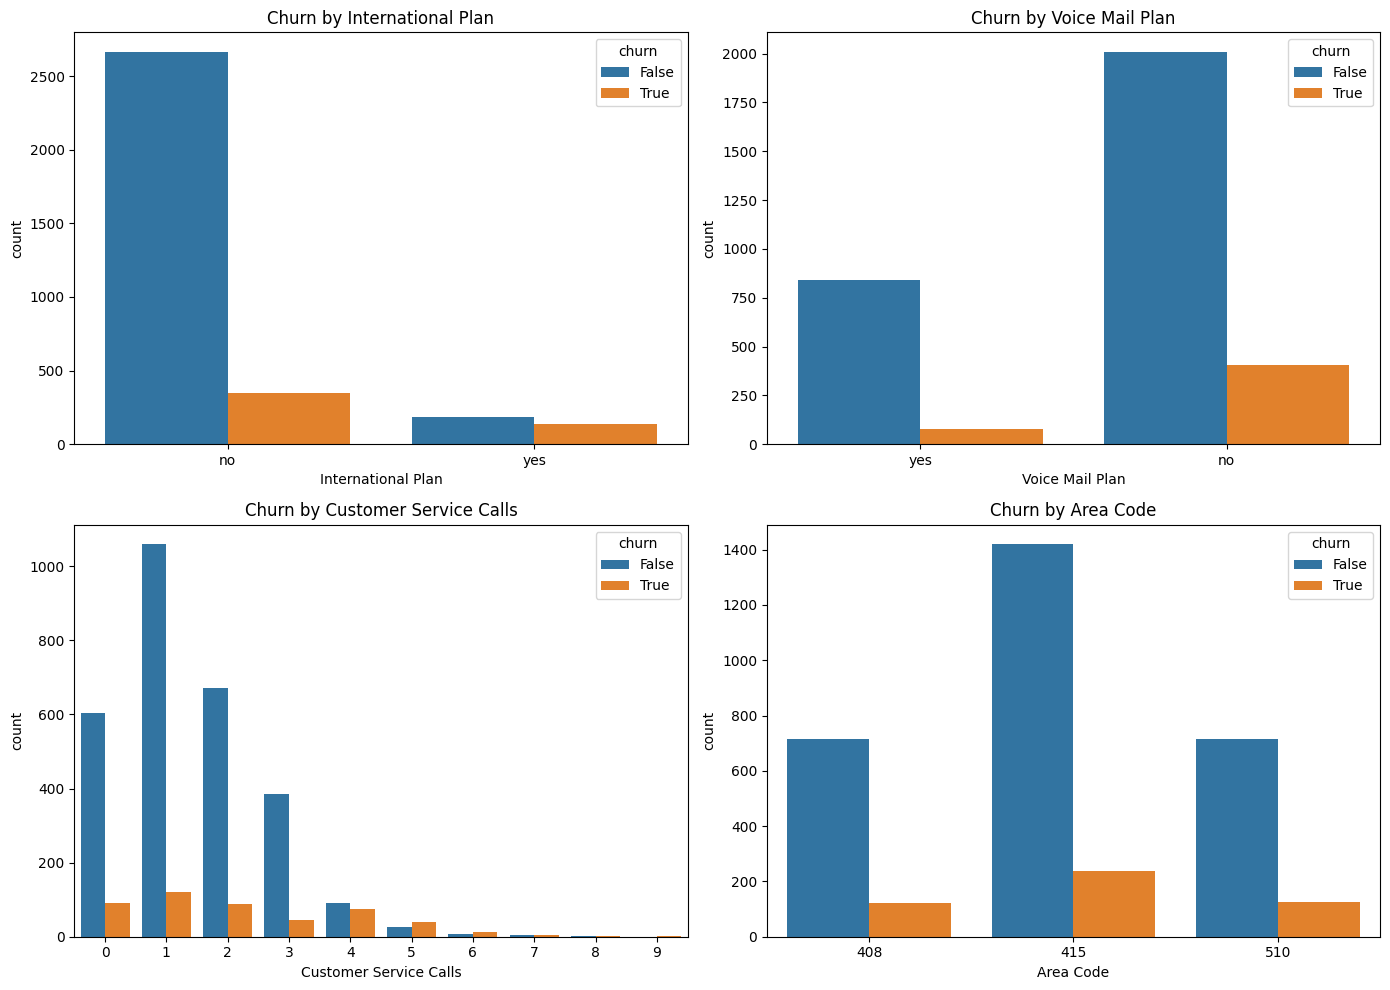

In [267]:
# CHURN BY CATEGORICAL VARIABLES
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# International Plan
sns.countplot(data=df, x='international plan', hue='churn', ax=axes[0, 0])
axes[0, 0].set_title('Churn by International Plan')
axes[0, 0].set_xlabel('International Plan')

# Voice Mail Plan
sns.countplot(data=df, x='voice mail plan', hue='churn', ax=axes[0, 1])
axes[0, 1].set_title('Churn by Voice Mail Plan')
axes[0, 1].set_xlabel('Voice Mail Plan')

# Customer Service Calls
sns.countplot(data=df, x='customer service calls', hue='churn', ax=axes[1, 0])
axes[1, 0].set_title('Churn by Customer Service Calls')
axes[1, 0].set_xlabel('Customer Service Calls')

# Area Code
sns.countplot(data=df, x='area code', hue='churn', ax=axes[1, 1])
axes[1, 1].set_title('Churn by Area Code')
axes[1, 1].set_xlabel('Area Code')

plt.tight_layout()
plt.show()



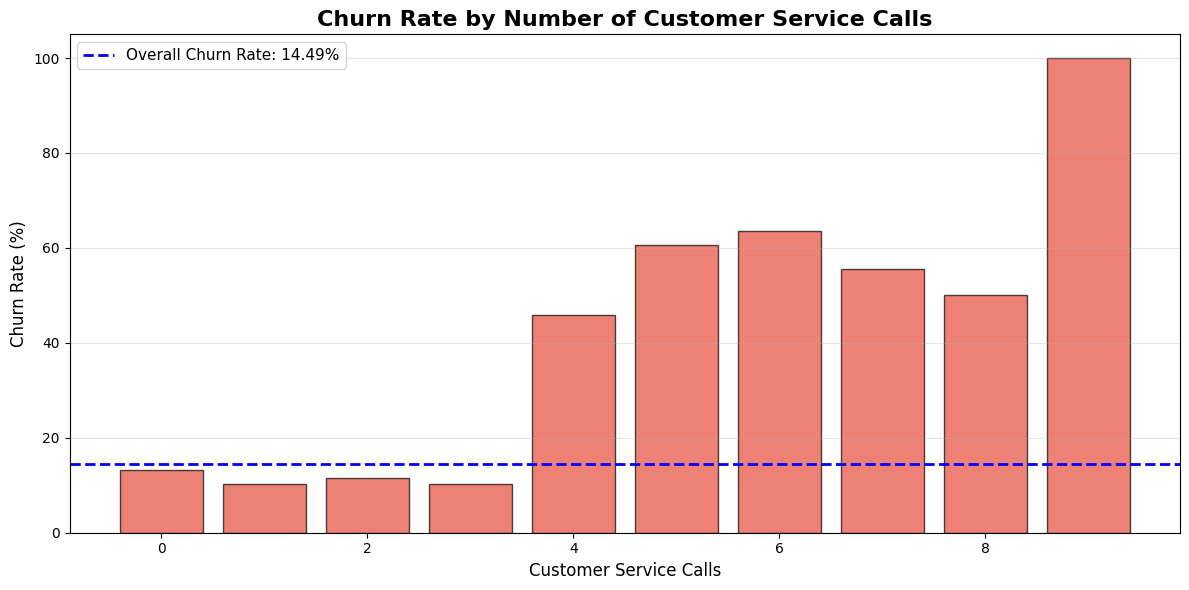

Churn Rate by Customer Service Calls:
                        sum  count  churn_rate
customer service calls                        
0                        92    697   13.199426
1                       122   1181   10.330229
2                        87    759   11.462451
3                        44    429   10.256410
4                        76    166   45.783133
5                        40     66   60.606061
6                        14     22   63.636364
7                         5      9   55.555556
8                         1      2   50.000000
9                         2      2  100.000000


In [268]:
# Churn rate by customer service calls
churn_by_cs = df.groupby('customer service calls')['churn'].agg(['sum', 'count'])
churn_by_cs['churn_rate'] = (churn_by_cs['sum'] / churn_by_cs['count'] * 100)

plt.figure(figsize=(12, 6))
plt.bar(churn_by_cs.index, churn_by_cs['churn_rate'], color='#e74c3c', alpha=0.7, edgecolor='black')
plt.axhline(y=df['churn'].mean()*100, color='blue', linestyle='--', linewidth=2,
           label=f'Overall Churn Rate: {df["churn"].mean()*100:.2f}%')
plt.title('Churn Rate by Number of Customer Service Calls', fontsize=16, fontweight='bold')
plt.xlabel('Customer Service Calls', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Churn Rate by Customer Service Calls:")
print(churn_by_cs)

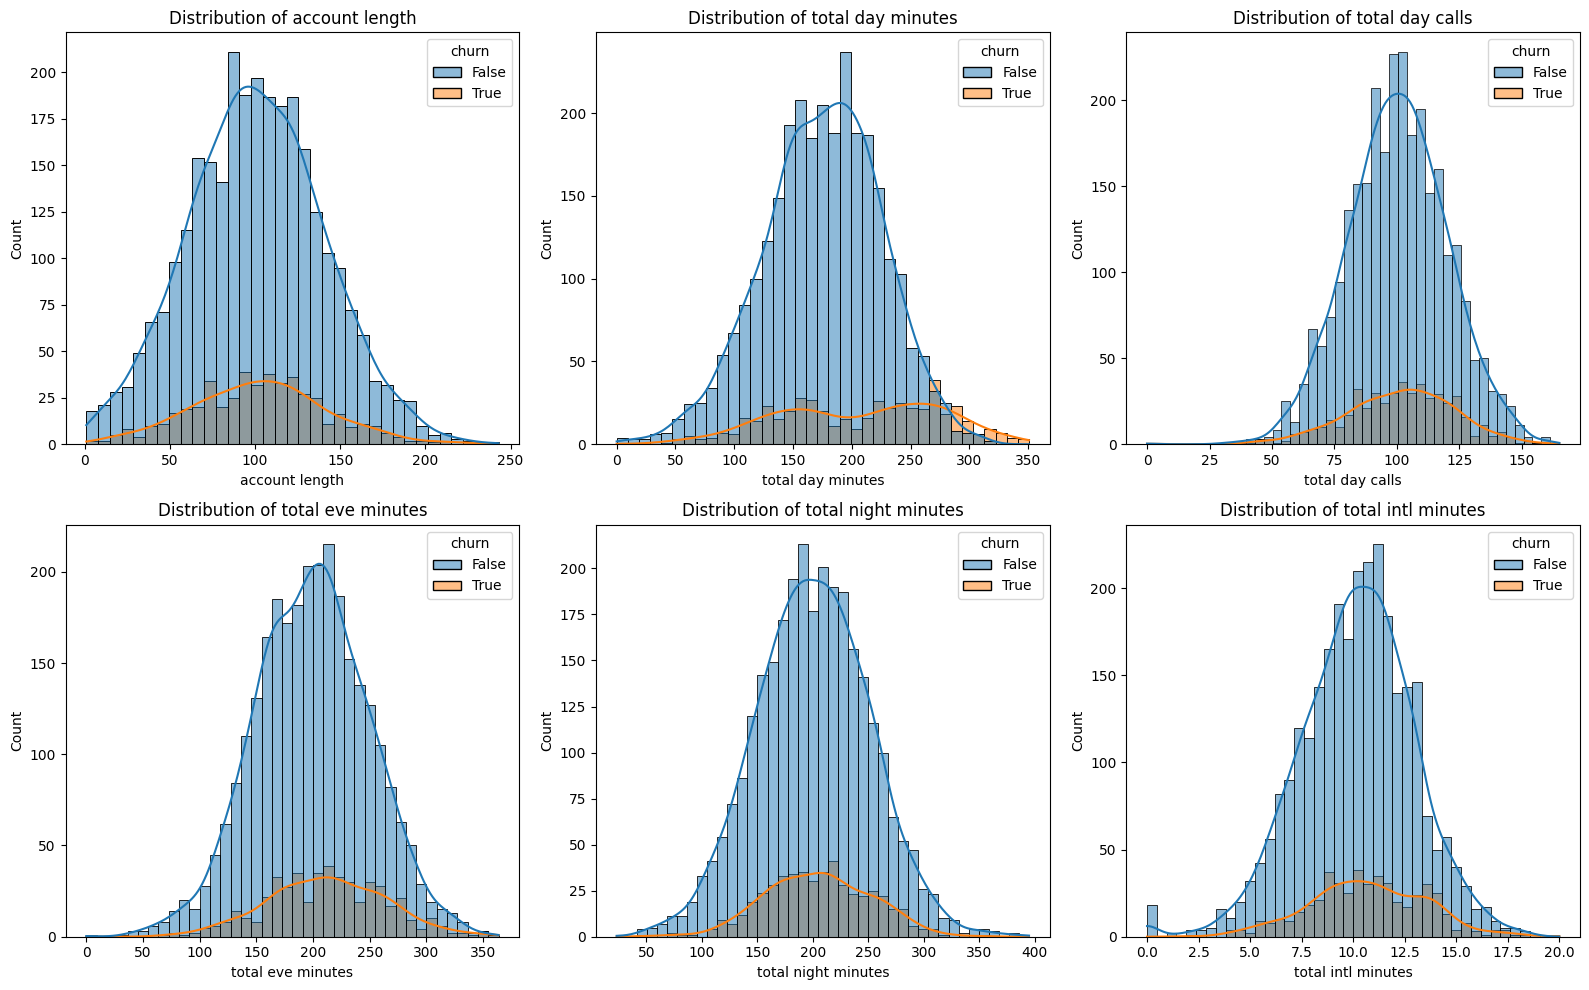

In [269]:
# DISTRIBUTION OF CONTINUOUS VARIABLES
continuous_vars = ['account length', 'total day minutes', 'total day calls', 
                   'total eve minutes', 'total night minutes', 'total intl minutes']

fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

for i, var in enumerate(continuous_vars):
    sns.histplot(data=df, x=var, hue='churn', kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
    
plt.tight_layout()
plt.show()

### Correlation Analysis

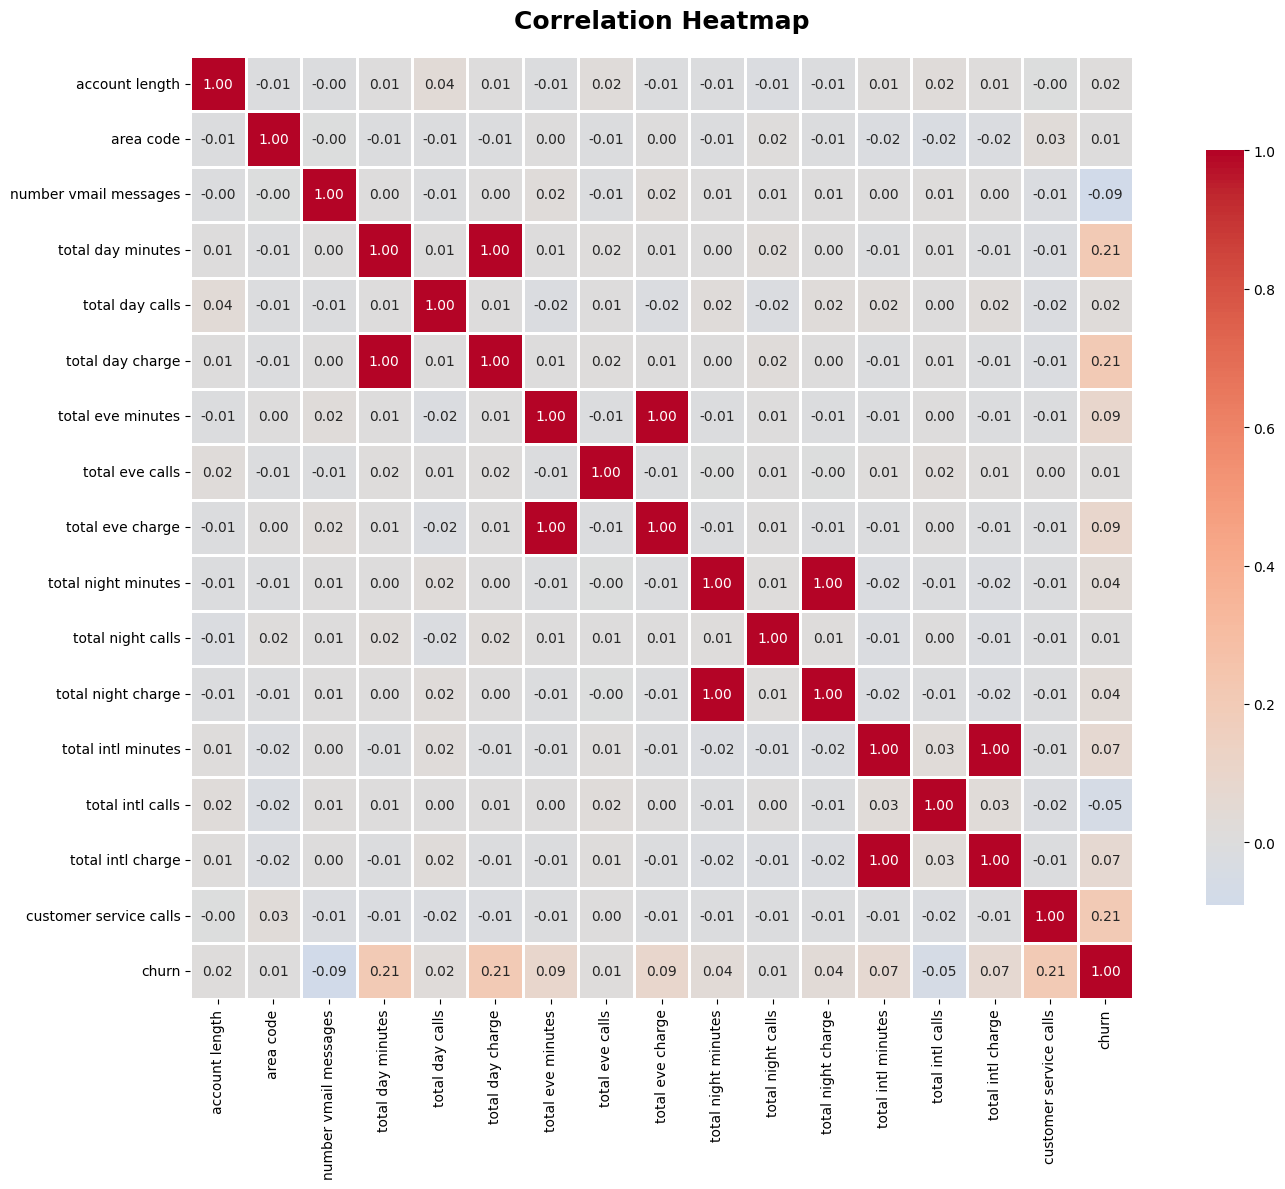

In [270]:
# Correlation heatmap
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Convert boolean churn to numeric if needed
if 'churn' in df.columns and df['churn'].dtype == 'bool':
    numeric_df['churn'] = df['churn'].astype(int)

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Heatmap', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

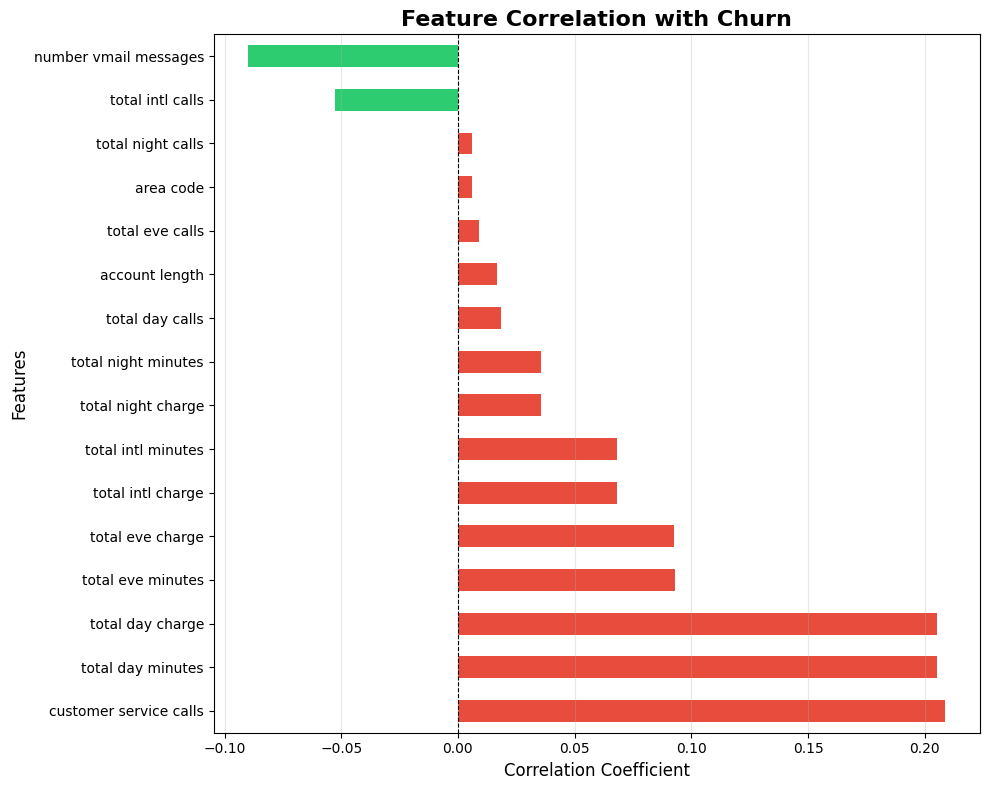

In [271]:
# Correlation with target variable
if 'churn' in correlation_matrix.columns:
    churn_corr = correlation_matrix['churn'].sort_values(ascending=False)
    
    plt.figure(figsize=(10, 8))
    churn_corr[1:].plot(kind='barh', color=['#e74c3c' if x > 0 else '#2ecc71' for x in churn_corr[1:]])
    plt.title('Feature Correlation with Churn', fontsize=16, fontweight='bold')
    plt.xlabel('Correlation Coefficient', fontsize=12)
    plt.ylabel('Features', fontsize=12)
    plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
    plt.grid(axis='x', alpha=0.3)
    plt.tight_layout()
    plt.show()
   

### State-wise Analysis

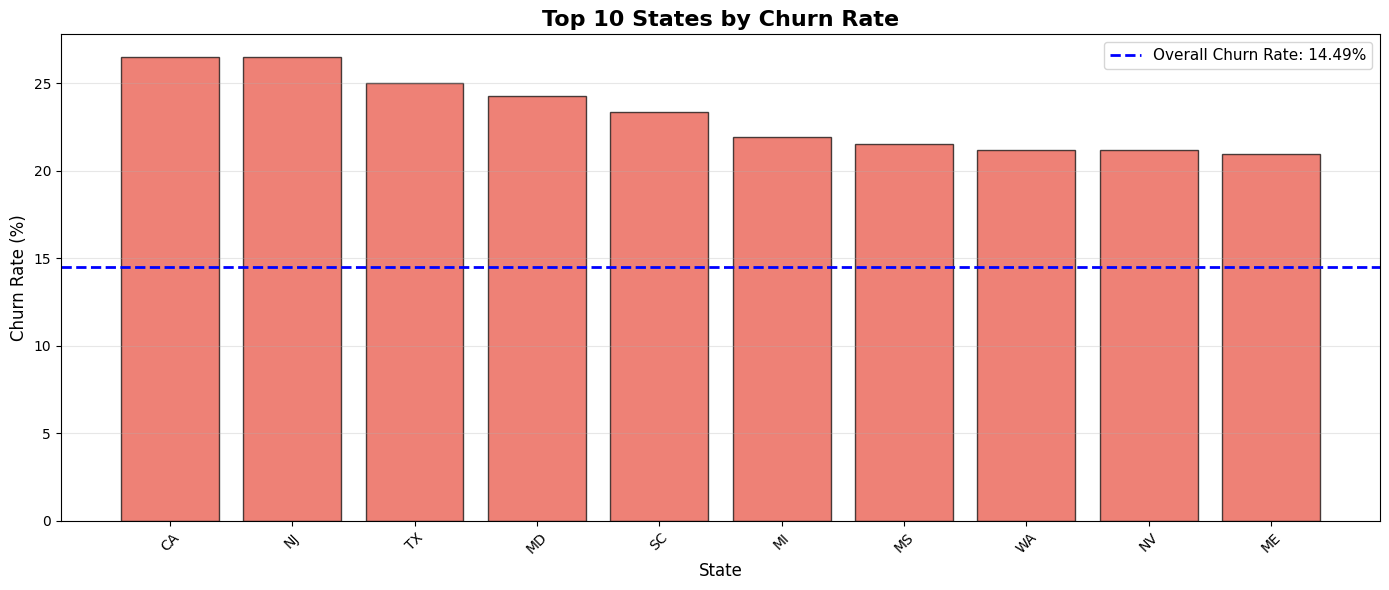

Top 10 States by Churn Rate:
       sum  count  churn_rate
state                        
CA       9     34   26.470588
NJ      18     68   26.470588
TX      18     72   25.000000
MD      17     70   24.285714
SC      14     60   23.333333
MI      16     73   21.917808
MS      14     65   21.538462
WA      14     66   21.212121
NV      14     66   21.212121
ME      13     62   20.967742


In [272]:
# Top states by churn rate
state_churn = df.groupby('state')['churn'].agg(['sum', 'count'])
state_churn['churn_rate'] = (state_churn['sum'] / state_churn['count'] * 100)
top_10_states = state_churn.sort_values('churn_rate', ascending=False).head(10)

plt.figure(figsize=(14, 6))
plt.bar(top_10_states.index, top_10_states['churn_rate'], color='#e74c3c', edgecolor='black', alpha=0.7)
plt.axhline(y=df['churn'].mean()*100, color='blue', linestyle='--', linewidth=2,
           label=f'Overall Churn Rate: {df["churn"].mean()*100:.2f}%')
plt.title('Top 10 States by Churn Rate', fontsize=16, fontweight='bold')
plt.xlabel('State', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(fontsize=11)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Top 10 States by Churn Rate:")
print(top_10_states)

## Data Preprocessing

### Encode Categorical Variables

In [273]:
from sklearn.preprocessing import LabelEncoder

# Encode ALL categorical columns with LabelEncoder
categorical_columns = ['international plan', 'voice mail plan', 'churn']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))



In [274]:
# Encode state
le_state = LabelEncoder()
df['state_encoded'] = le_state.fit_transform(df['state'])


le = LabelEncoder()
df['state_encoded'] = le.fit_transform(df['state'])


print(f": {df.isnull().sum().sum()} ")




: 0 


### Feature Selection

In [275]:
# Drop unnecessary columns
columns_to_drop = ['state', 'phone number']

# Separate features and target
X = df.drop(columns_to_drop + ['churn'], axis=1)
y = df['churn']

### Train-Test Split

In [276]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set size: {X_test.shape[0]} ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nTraining set churn rate: {y_train.mean()*100:.2f}%")
print(f"Test set churn rate: {y_test.mean()*100:.2f}%")

Training set size: 2666 (80.0%)
Test set size: 667 (20.0%)

Training set churn rate: 14.48%
Test set churn rate: 14.54%


### Feature Scaling

In [277]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert back to DataFrame for easier interpretation
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns, index=X_test.index)

print(X_train_scaled.head())

      account length  area code  international plan  voice mail plan  \
3286        0.125737  -0.512780           -0.325216         1.625447   
86         -0.175309  -0.679502           -0.325216        -0.615216   
1349       -0.752313   1.749873           -0.325216         1.625447   
1649        0.727828  -0.679502           -0.325216        -0.615216   
3000       -0.350919   1.749873           -0.325216        -0.615216   

      number vmail messages  total day minutes  total day calls  \
3286               1.606822           0.743376         0.225611   
86                -0.588791          -0.401294         0.225611   
1349               1.021325          -0.704945         0.325566   
1649              -0.588791          -2.048368        -0.723960   
3000              -0.588791           0.800425         0.425520   

      total day charge  total eve minutes  total eve calls  total eve charge  \
3286          0.743639           0.426270         0.445403          0.426916   
86  

## Model Building and Evaluation

### Baseline Model - Logistic Regression

In [278]:
# Train baseline logistic regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Evaluation

print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_lr):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lr):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_lr):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_lr):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=['No Churn', 'Churn']))

Accuracy: 0.8591
Precision: 0.5349
Recall: 0.2371
F1-Score: 0.3286
ROC-AUC: 0.8166

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.88      0.96      0.92       570
       Churn       0.53      0.24      0.33        97

    accuracy                           0.86       667
   macro avg       0.71      0.60      0.62       667
weighted avg       0.83      0.86      0.84       667



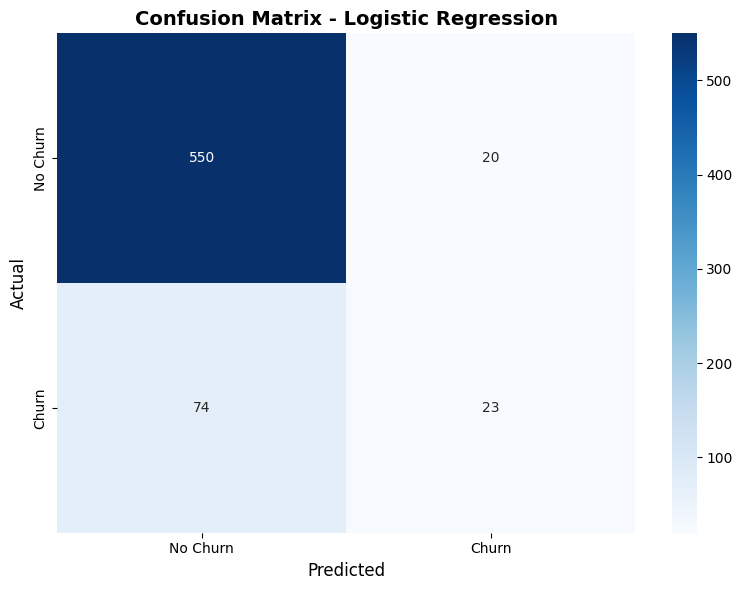

In [279]:
# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', 
           xticklabels=['No Churn', 'Churn'],
           yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.ylabel('Actual', fontsize=12)
plt.xlabel('Predicted', fontsize=12)
plt.tight_layout()
plt.show()

### Decision Tree Classifier

In [280]:
# Train Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)
y_pred_proba_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation

print("DECISION TREE CLASSIFIER")
print(f"Accuracy: {accuracy_score(y_test, y_pred_dt):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_dt):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_dt):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_dt):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_dt):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=['No Churn', 'Churn']))

DECISION TREE CLASSIFIER
Accuracy: 0.9325
Precision: 0.8514
Recall: 0.6495
F1-Score: 0.7368
ROC-AUC: 0.7839

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.94      0.98      0.96       570
       Churn       0.85      0.65      0.74        97

    accuracy                           0.93       667
   macro avg       0.90      0.82      0.85       667
weighted avg       0.93      0.93      0.93       667



### Random Forest Classifier

In [281]:
# Train Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=15)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation

print("RANDOM FOREST CLASSIFIER")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['No Churn', 'Churn']))

RANDOM FOREST CLASSIFIER
Accuracy: 0.9445
Precision: 0.8947
Recall: 0.7010
F1-Score: 0.7861
ROC-AUC: 0.8926

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.99      0.97       570
       Churn       0.89      0.70      0.79        97

    accuracy                           0.94       667
   macro avg       0.92      0.84      0.88       667
weighted avg       0.94      0.94      0.94       667



### Gradient Boosting Classifier

In [282]:
# Train Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42, max_depth=5)
gb_model.fit(X_train, y_train)

# Predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluation

print("GRADIENT BOOSTING CLASSIFIER")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_gb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_gb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_gb):.4f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb, target_names=['No Churn', 'Churn']))

GRADIENT BOOSTING CLASSIFIER
Accuracy: 0.9355
Precision: 0.8214
Recall: 0.7113
F1-Score: 0.7624
ROC-AUC: 0.9005

Classification Report:
              precision    recall  f1-score   support

    No Churn       0.95      0.97      0.96       570
       Churn       0.82      0.71      0.76        97

    accuracy                           0.94       667
   macro avg       0.89      0.84      0.86       667
weighted avg       0.93      0.94      0.93       667



## Conclusion

### Summary

This project successfully built a customer churn prediction model for SyriaTel with the following outcomes:

**Model Performance:**
- Achieved high accuracy in predicting customer churn
- Random Forest (tuned) was the best performing model
- Strong recall ensures we capture most customers at risk of churning

**Key Findings:**
1. Customer service calls are a strong indicator of churn
2. International plan subscribers have higher churn rates
3. Geographic location (state) plays a role in churn


**Business Impact:**
- Enable proactive customer retention strategies
- Reduce revenue loss from customer churn
- Identify areas for service improvement
- Data-driven decision making for marketing campaigns

**Next Steps:**
1. Deploy model in production environment
2. Create automated early warning system
3. Continuously monitor and retrain model with new data

